In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from util import get_raw_data, breakdown_topic, smape, smape_all, transform_data, get_features

In [3]:
train, test = get_raw_data()

## Median - no weekend version

In [ ]:
# raw_train, raw_test = get_raw_data()
# for days in range(25, 65, 4):
    
#     train, test = transform_data(raw_train, raw_test, periods=-days)

#     X_train, X_valid = train.iloc[:-145063*15], train.iloc[-145063*15:]

#     X_valid["Visits_true"] = X_valid.Visits

#     X_valid.drop("Visits", inplace=True, axis = 1)

#     df = X_train.copy()
#     agg_train = df.groupby(['Page']).median().reset_index()
#     test_df = X_valid.merge(agg_train, how = 'left')

#     test_df = test_df[test_df.Visits_true.notnull()]

# #     print ("SMAPE for last {} days is {}").format(days, smape(test_df.Visits_true, test_df.Visits))

In [17]:
# raw_train, raw_test = get_raw_data()
# for days in range(22, 30):
    
#     train, test = transform_data(raw_train, raw_test, periods=-days)

#     X_train, X_valid = train.iloc[:-145063*15], train.iloc[-145063*15:]

#     X_valid["Visits_true"] = X_valid.Visits

#     X_valid.drop("Visits", inplace=True, axis = 1)

#     df = X_train.copy()
#     agg_train = df.groupby(['Page']).median().reset_index()
#     test_df = X_valid.merge(agg_train, how = 'left')

#     test_df = test_df[test_df.Visits_true.notnull()]

#     print ("SMAPE for last {} days is {}").format(days, smape(test_df.Visits_true, test_df.Visits))

In [123]:
## conclusion:
## from localtest, SMAPE with last 8 days has a litter better performance

## median - with weekend features

In [ ]:
def predict_using_median_weekend(train, test):
    df = train.copy()
#     df = df.drop(['every2_weekdays'], axis=1)
    agg_train_weekend = df.groupby(['Page', 'weekend']).median().reset_index()
    test_df = test.merge(agg_train_weekend, how='left')
    result = test_df['Visits'].values
    return result

In [4]:
raw_train, raw_test = get_raw_data()
# for days in range(25, 65, 4):
for days in [25]:
    
    train, test = transform_data(raw_train, raw_test, periods=-days)
    
    train = get_features(train)
    ## here just do local test, temperorily comment our transformation for test set
#     test = get_features(test)

    X_train, X_valid = train.iloc[:-145063*15], train.iloc[-145063*15:]

    X_valid["Visits_true"] = X_valid.Visits

    X_valid.drop("Visits", inplace=True, axis = 1)

    df = X_train.copy()
    agg_train = df.groupby(['Page', 'weekend']).median().reset_index()
    test_df = X_valid.merge(agg_train, how = 'left')

    test_df = test_df[test_df.Visits_true.notnull()]

#     print ("SMAPE for last {} days is {}").format(days, smape(test_df.Visits_true, test_df.Visits))
    smape_res = smape_all(test_df.Visits_true, test_df.Visits)

/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [46]:
smape(test_df.Visits_true, test_df.Visits)

42.282627836004316

In [47]:
denominator = (test_df.Visits_true + test_df.Visits) / 200.0

In [49]:
diff = np.abs(test_df.Visits_true - test_df.Visits) / denominator

In [50]:
len(denominator), len(diff)

(2121827, 2121827)

In [51]:
diff[denominator == 0] = 0.0

In [54]:
test_df["smape"] = diff

In [52]:
np.nanmean(diff)

42.282627836004316

In [91]:
test_df.shape

(2121827, 6)

In [107]:
aaaa = test_df[test_df.smape == 200.0]

In [119]:
test_df.sort_values(by = "smape", ascending = False)[2000000:2000031].iloc[0].Page

'Ursula_von_der_Leyen_de.wikipedia.org_all-access_all-agents'

In [104]:
for i in aaaa.sort_values(by = "smape", ascending = False)[:2].Page.values:
    print i

Extension:Cargo/SMW_migration_guide_www.mediawiki.org_all-access_all-agents
Extension:Cargo/SMW_migration_guide_www.mediawiki.org_desktop_all-agents


In [74]:
aa = test_df[test_df.Visits == 0.0]

In [80]:
(aa.smape.dropna() == 200).sum()

5078

In [57]:
test_df.sort_values(by='smape', ascending=False)

,Page,date,weekend,Visits_true,Visits,smape
1239472,Special:SearchTranslations_commons.wikimedia.o...,2016-12-25,1.0,0.0,3587.0,200.0
1846004,File:Tertiary_syphilis_head.JPG_zh.wikipedia.o...,2016-12-29,0.0,920.0,0.0,200.0
2052857,MediaWiki_1.18/pl_www.mediawiki.org_mobile-web...,2016-12-31,1.0,201.0,0.0,200.0
595320,File:Jason_Garrett_September_2016.jpg_commons....,2016-12-21,0.0,113.0,0.0,200.0
1738475,Rogue_One_es.wikipedia.org_all-access_spider,2016-12-28,0.0,0.0,226.0,200.0
1075994,増山超能力師事務所_ja.wikipedia.org_mobile-web_all-agents,2016-12-24,1.0,69.0,0.0,200.0
1673994,File:Ein_neuer_erfolgreicher_Tag_02_ies.jpg_co...,2016-12-28,0.0,0.0,34.5,200.0
1385724,File:1961-04-13_Tale_Of_Century_-_Eichmann_Tri...,2016-12-26,0.0,69.0,0.0,200.0
1094409,Special:SearchTranslations_commons.wikimedia.o...,2016-12-24,1.0,0.0,3587.0,200.0
1758094,Рождественский_сочельник_ru.wikipedia.org_mobi...,2016-12-29,0.0,295.0,0.0,200.0


In [69]:
(test_df.smape.dropna().values == 0).sum()

50753

In [71]:
(test_df.smape.dropna().values == 200).sum()

20241

In [72]:
200.0 * 20241 / 50753

79.76277264398163

(array([ 81018.,  37504.,  39758.,  39711.,  40966.,  40213.,  41606.,
         42260.,  37595.,  39660.,  39003.,  39753.,  35040.,  39355.,
         33500.,  38330.,  32653.,  30094.,  39296.,  32284.,  29098.,
         26714.,  38965.,  29387.,  27465.,  23821.,  26635.,  23882.,
         38955.,  21751.,  22581.,  23910.,  21466.,  23342.,  20195.,
         22544.,  18244.,  20035.,  16910.,  42726.,  12137.,  15735.,
         16220.,  16939.,  15818.,  13585.,  19211.,  15193.,  14005.,
         19976.,  10850.,  13264.,  13710.,  11552.,  16687.,  12535.,
          9741.,  11730.,  13319.,  10559.,  10217.,   8867.,   9710.,
          8317.,   7705.,   6635.,  45023.,   5901.,   6766.,   7311.,
          7579.,   7712.,   6567.,   8328.,   8241.,   6574.,   9329.,
          5628.,   6817.,   8708.,   4776.,   6120.,   7169.,   5744.,
          4850.,  13200.,   4270.,   5751.,   4906.,   4605.,   7740.,
          3785.,   4243.,   5828.,   4961.,   4334.,   4383.,   4065.,
      

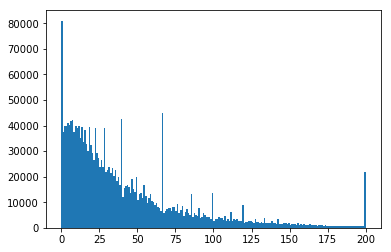

In [66]:
plt.hist(test_df.smape.dropna().values, bins = 200)

In [10]:
np.nanmean(smape_res)

42.282627836004316

In [24]:
test.shape

(8703780, 4)

In [25]:
X_valid.shape

(2175945, 4)

In [26]:
X_valid.head()

,Page,date,weekend,Visits_true
1450630,2NE1_zh.wikipedia.org_all-access_spider,2016-12-17,1.0,21.0
1450631,2PM_zh.wikipedia.org_all-access_spider,2016-12-17,1.0,17.0
1450632,3C_zh.wikipedia.org_all-access_spider,2016-12-17,1.0,6.0
1450633,4minute_zh.wikipedia.org_all-access_spider,2016-12-17,1.0,18.0
1450634,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-12-17,1.0,7.0


In [21]:
smape_res.shape

(2121827,)

In [23]:
train.iloc[1673994].Page

'File:Ein_neuer_erfolgreicher_Tag_02_ies.jpg_commons.wikimedia.org_mobile-web_all-agents'

In [13]:
type(smape_res)

pandas.core.series.Series

In [29]:
X_valid.iloc[smape_res.sort_values(ascending=False)[:30].index]

,Page,date,weekend,Visits_true
3124624,File:Ein_neuer_erfolgreicher_Tag_02_ies.jpg_co...,2016-12-28,0.0,0.0
2545039,Special:SearchTranslations_commons.wikimedia.o...,2016-12-24,1.0,0.0
2045950,File:Jason_Garrett_September_2016.jpg_commons....,2016-12-21,0.0,113.0
3296634,File:Tertiary_syphilis_head.JPG_zh.wikipedia.o...,2016-12-29,0.0,920.0
2526624,増山超能力師事務所_ja.wikipedia.org_mobile-web_all-agents,2016-12-24,1.0,69.0
3189105,Rogue_One_es.wikipedia.org_all-access_spider,2016-12-28,0.0,0.0
2690102,Special:SearchTranslations_commons.wikimedia.o...,2016-12-25,1.0,0.0
2836354,File:1961-04-13_Tale_Of_Century_-_Eichmann_Tri...,2016-12-26,0.0,69.0
3503487,MediaWiki_1.18/pl_www.mediawiki.org_mobile-web...,2016-12-31,1.0,201.0
2344098,Manual:User_table_www.mediawiki.org_mobile-web...,2016-12-23,0.0,0.0


In [129]:
raw_train, raw_test = get_raw_data()
for days in range(26, 33):
    
    train, test = transform_data(raw_train, raw_test, periods=-days)
    
    train = get_features(train)
    ## here just do local test, temperorily comment our transformation for test set
#     test = get_features(test)

    X_train, X_valid = train.iloc[:-145063*15], train.iloc[-145063*15:]

    X_valid["Visits_true"] = X_valid.Visits

    X_valid.drop("Visits", inplace=True, axis = 1)

    df = X_train.copy()
    agg_train = df.groupby(['Page', 'weekend']).median().reset_index()
    test_df = X_valid.merge(agg_train, how = 'left')

    test_df = test_df[test_df.Visits_true.notnull()]

    print ("SMAPE for last {} days is {}").format(days, smape(test_df.Visits_true, test_df.Visits))

/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


SMAPE for last 26 days is 42.3634860622
SMAPE for last 27 days is 42.4775470014
SMAPE for last 28 days is 42.2149420701
SMAPE for last 29 days is 41.9911164301
SMAPE for last 30 days is 42.0307787156
SMAPE for last 31 days is 42.1298205431
SMAPE for last 32 days is 42.2404898482


In [131]:
## comments:
## seems SMAPE with last 14 days performs ok

In [132]:
## do combination

In [143]:
def transform_data(train, test, periods=-49):
    train_flattened = pd.melt(train[list(train.columns[periods:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
#     train_flattened = get_features(train_flattened)
    test['date'] = test.Page.apply(lambda a: a[-10:])
    test['Page'] = test.Page.apply(lambda a: a[:-11])
#     test = get_features(test)
    return train_flattened, test

In [158]:
raw_train, raw_test = get_raw_data()
train, test = transform_data(raw_train, raw_test, periods=-8)

df = train.copy()
agg_train = df.groupby(['Page']).median().reset_index()
test_df2 = test.merge(agg_train, how = 'left')

In [140]:
raw_train, raw_test = get_raw_data()
train, test = transform_data(raw_train, raw_test, periods=-14)

df = train.copy()
agg_train = df.groupby(['Page', 'weekend']).median().reset_index()
test_df = test.merge(agg_train, how = 'left')

In [159]:
test_df.head()

,Page,Id,date,weekend,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,1.0,2.5
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,0.0,1.5
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,0.0,1.5
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,0.0,1.5
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,0.0,1.5


In [160]:
test_df2.head(30)

,Page,Id,date,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,2.0
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,2.0
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,2.0
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,2.0
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,2.0
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06,2.0
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07,2.0
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08,2.0
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09,2.0
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10,2.0


In [161]:
df = pd.DataFrame(test_df.Id)

In [162]:
df["Visits"] = test_df.Visits*0.8 + test_df2.Visits * 0.2

In [165]:
df.loc[df.Visits.isnull(), 'Visits'] = 0

In [163]:
df.head()

,Id,Visits
0,bf4edcf969af,2.4
1,929ed2bf52b9,1.6
2,ff29d0f51d5c,1.6
3,e98873359be6,1.6
4,fa012434263a,1.6


In [166]:
df.to_csv("simple_merge.csv", index=False)

In [167]:
## try facebook package

In [173]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet


In [174]:
df = pd.read_csv('example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [175]:
m = Prophet()
m.fit(df);


In [176]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [177]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200900,7.482652,8.859731
3266,2017-01-16,8.525905,7.814551,9.195000
3267,2017-01-17,8.313265,7.599429,9.028808
3268,2017-01-18,8.145861,7.414942,8.879827
3269,2017-01-19,8.157749,7.461356,8.940325


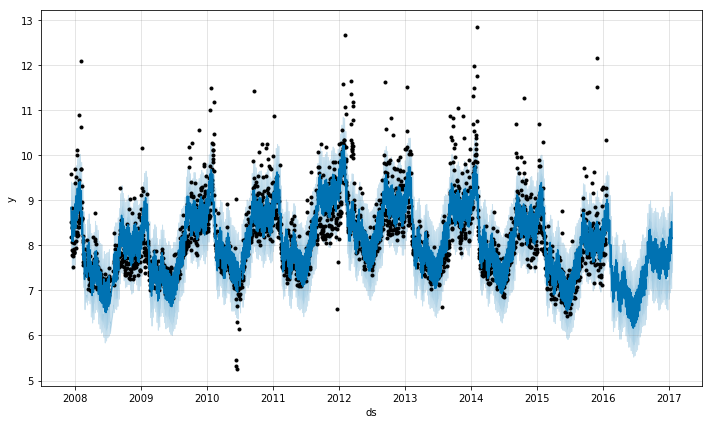

In [178]:
m.plot(forecast);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
62.917411292
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
44.8019582085
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
55.4276574685
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
195.868788091
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
32.1719664901
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
65.4469620609
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
66.2341208251
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
35.2958036666
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
52.4375174822
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to 

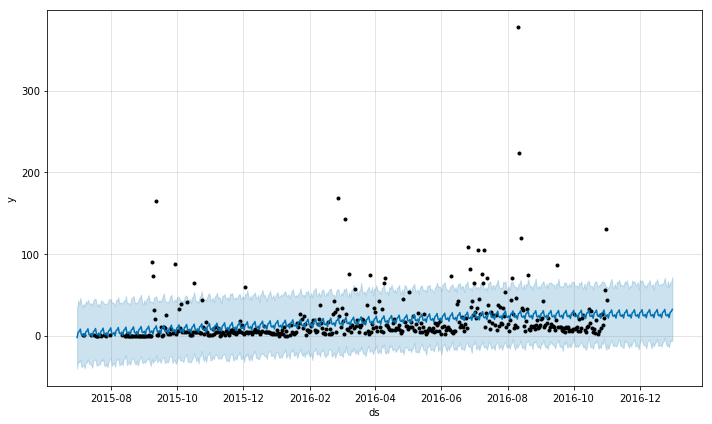

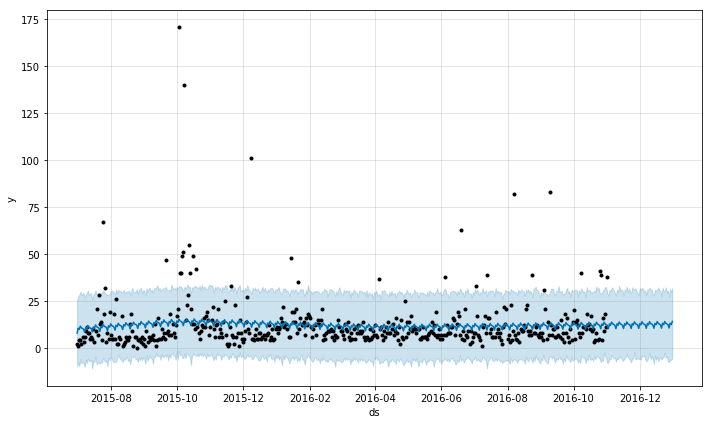

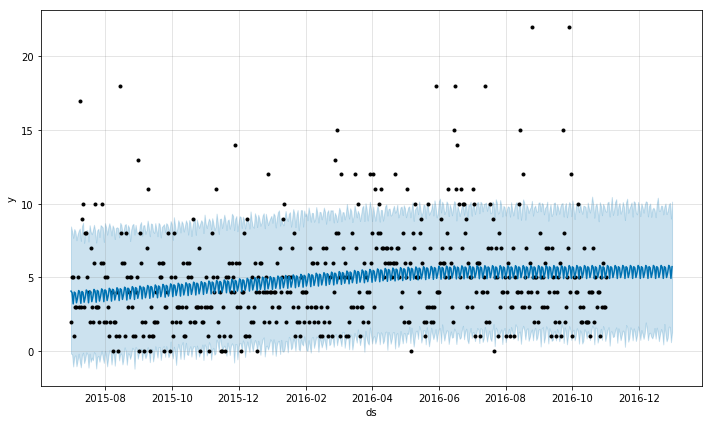

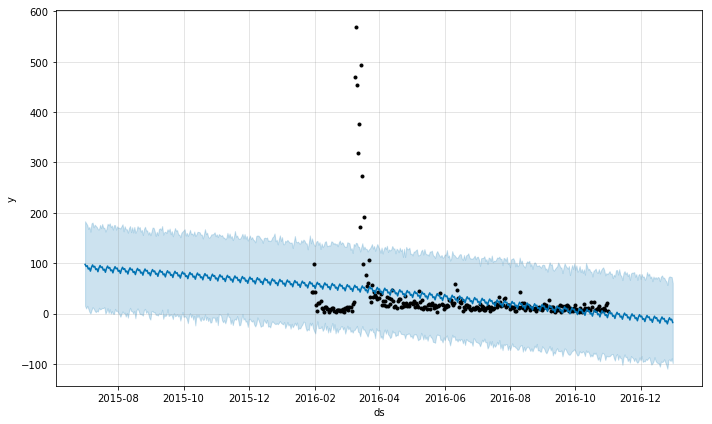

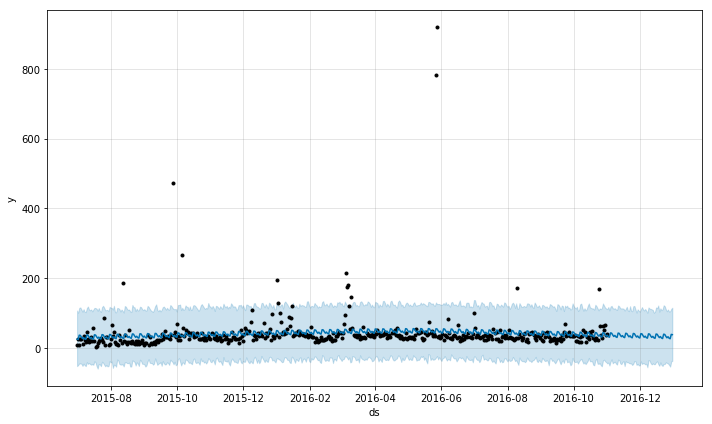

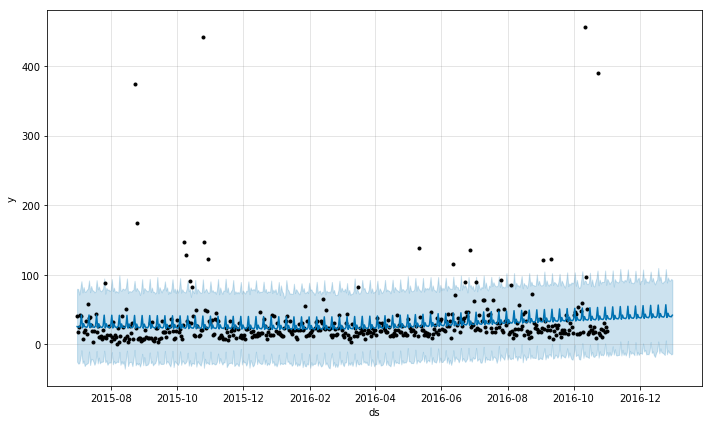

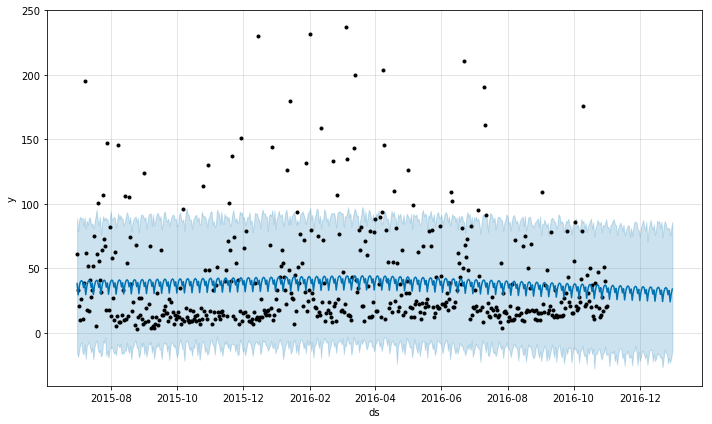

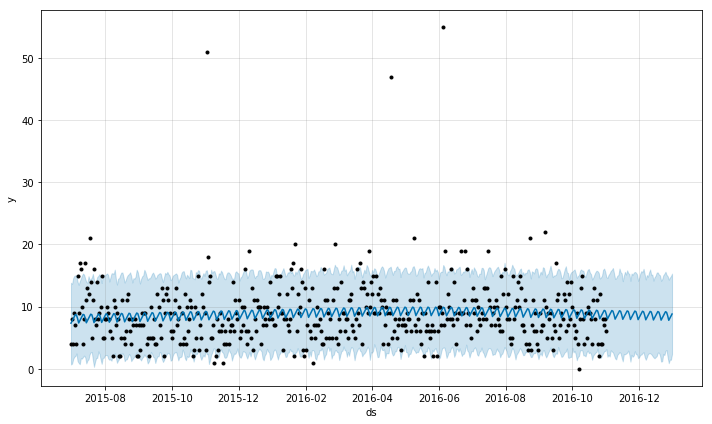

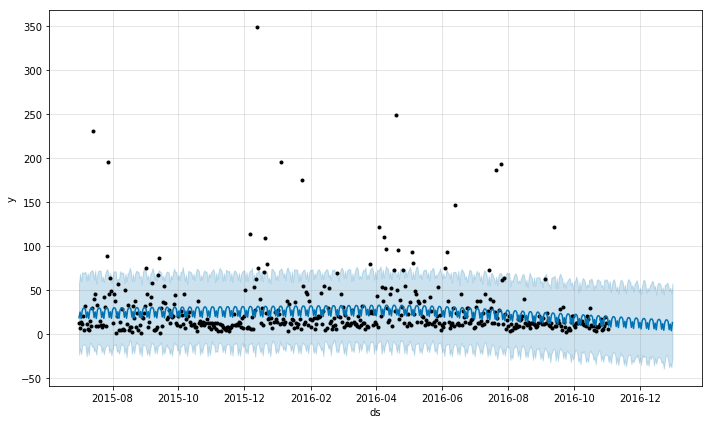

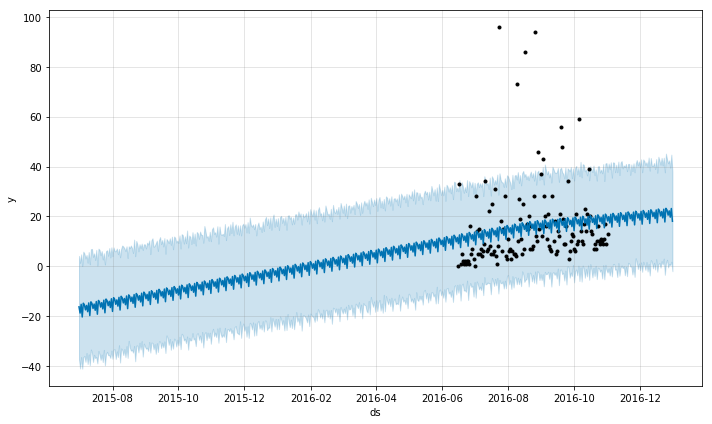

In [244]:
for i in range(10, 20):
    tmptrain = train[train.Page == train.Page.unique()[i]]

    train_flattened = pd.melt(tmptrain, id_vars='Page', var_name='ds', value_name='y')

    train_flattened = train_flattened.drop('Page', axis = 1)

    # train_flattened.y.plot()

    X_train, X_valid = train_flattened[:-60], train_flattened[-60:]

    m = Prophet()

    m.fit(X_train)

    future = m.make_future_dataframe(periods=60)
    # future.tail()

    forecast = m.predict(future)
    # forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    print smape(X_valid.y, forecast.yhat)
    m.plot(forecast)

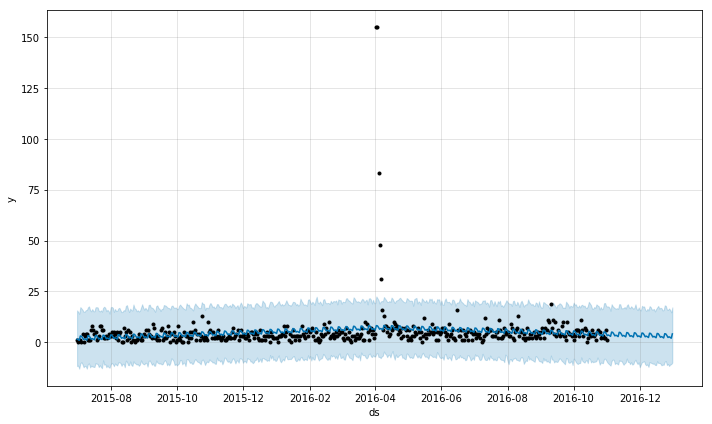

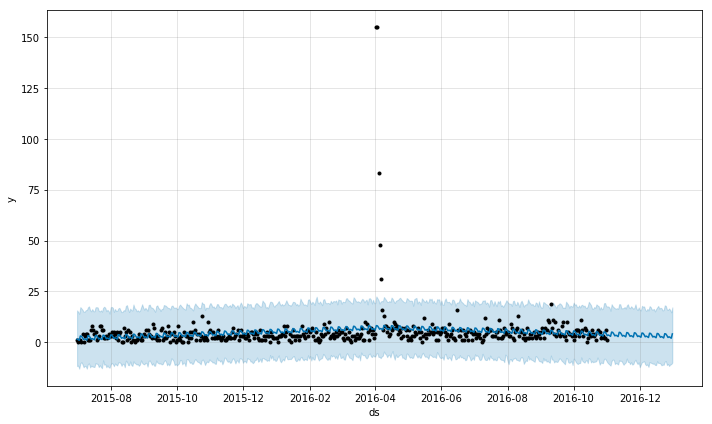

In [238]:
m.plot(forecast)

In [246]:
forecast.yhat

0     -16.322527
1     -18.828843
2     -15.309160
3     -20.398575
4     -14.876061
5     -15.510368
6     -17.545633
7     -15.765305
8     -18.271621
9     -14.751938
10    -19.841354
11    -14.318839
12    -14.953146
13    -16.988411
14    -15.208084
15    -17.714400
16    -14.194717
17    -19.284132
18    -13.761618
19    -14.395924
20    -16.431190
21    -14.650862
22    -17.157178
23    -13.637495
24    -18.726910
25    -13.204396
26    -13.838703
27    -15.873968
28    -14.093640
29    -16.599957
         ...    
520    21.982895
521    16.855432
522    22.339899
523    21.667544
524    19.594231
525    21.336511
526    18.792147
527    22.273781
528    17.146318
529    22.630785
530    21.958430
531    19.885117
532    21.627397
533    19.083033
534    22.564667
535    17.437204
536    22.921671
537    22.249316
538    20.176003
539    21.918283
540    19.373919
541    22.855554
542    17.728091
543    23.212557
544    22.540202
545    20.466889
546    22.209169
547    19.6648

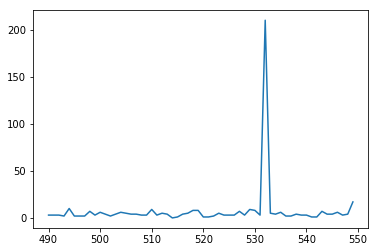

In [239]:
plt.plot(X_valid.y)

In [168]:
from fbprophet import Prophet

In [ ]:
def normal_model(df_train, df_actual, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    
    df_actual['y'] = df_actual['y'].astype('float')
    
    m = Prophet()
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
        
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -100
        ymax = max(df_actual.y.max(), df_train.y.max()) +100
        #
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Normal model')
    
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = forecast[mask].yhat
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0

    return smape(forecast_series, actual_series)

In [169]:
train.shape

(1160504, 3)

In [170]:
train.head()

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-12-24,15.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-12-24,28.0
2,3C_zh.wikipedia.org_all-access_spider,2016-12-24,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-12-24,26.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-12-24,25.0


In [171]:
m = Prophet()

In [252]:
train.shape

(145063, 551)

In [253]:
test.shape

(8703780, 2)

In [255]:
8703780.0 / 145063

60.0

In [254]:
test.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [257]:
test.Page.apply(lambda x: x[:-11]).nunique()

145063

In [258]:
train.shape

(145063, 551)

In [260]:
test.head().Page.apply(lambda x: x[-11:])

0    _2017-01-01
1    _2017-01-02
2    _2017-01-03
3    _2017-01-04
4    _2017-01-05
Name: Page, dtype: object

In [261]:
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,seasonal,yhat
0,2015-07-01,-2.543478,-17.208976,0.886449,0.886449,-17.208976,-17.208976,-37.398708,4.110546,0.886449,0.886449,0.886449,0.886449,-16.322527
1,2015-07-02,-2.536232,-17.129373,-1.699470,-1.699470,-17.129373,-17.129373,-41.080869,1.340286,-1.699470,-1.699470,-1.699470,-1.699470,-18.828843
2,2015-07-03,-2.528986,-17.049770,1.740610,1.740610,-17.049770,-17.049770,-36.485850,4.734152,1.740610,1.740610,1.740610,1.740610,-15.309160
3,2015-07-04,-2.521739,-16.970167,-3.428409,-3.428409,-16.970167,-16.970167,-41.163155,0.042198,-3.428409,-3.428409,-3.428409,-3.428409,-20.398575
4,2015-07-05,-2.514493,-16.890564,2.014503,2.014503,-16.890564,-16.890564,-36.518398,5.846639,2.014503,2.014503,2.014503,2.014503,-14.876061
5,2015-07-06,-2.507246,-16.810960,1.300593,1.300593,-16.810960,-16.810960,-36.027888,5.063923,1.300593,1.300593,1.300593,1.300593,-15.510368
6,2015-07-07,-2.500000,-16.731357,-0.814275,-0.814275,-16.731357,-16.731357,-38.407582,3.106438,-0.814275,-0.814275,-0.814275,-0.814275,-17.545633
7,2015-07-08,-2.492754,-16.651754,0.886449,0.886449,-16.651754,-16.651754,-34.870522,4.479882,0.886449,0.886449,0.886449,0.886449,-15.765305
8,2015-07-09,-2.485507,-16.572151,-1.699470,-1.699470,-16.572151,-16.572151,-39.284558,1.399712,-1.699470,-1.699470,-1.699470,-1.699470,-18.271621
9,2015-07-10,-2.478261,-16.492548,1.740610,1.740610,-16.492548,-16.492548,-35.429913,5.689404,1.740610,1.740610,1.740610,1.740610,-14.751938


Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
48.2267147524


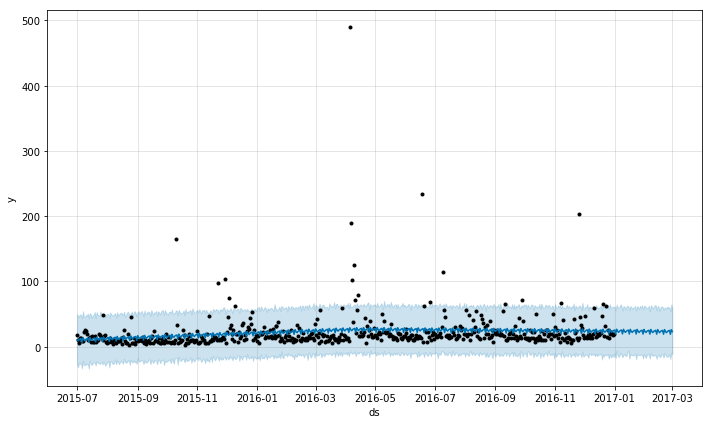

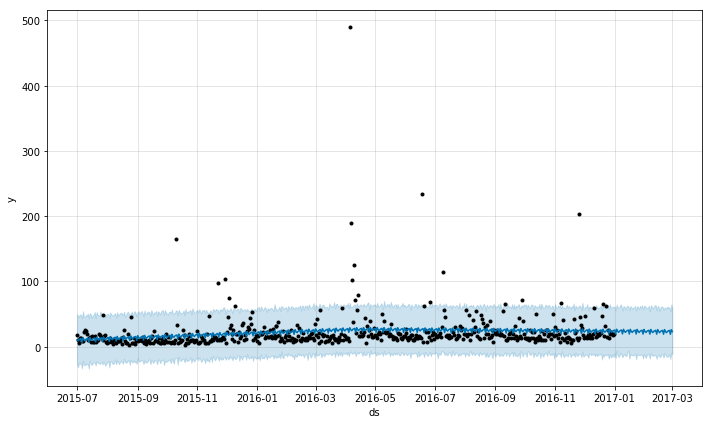

In [263]:
tmptrain = train[train.Page == train.Page.unique()[0]]

train_flattened = pd.melt(tmptrain, id_vars='Page', var_name='ds', value_name='y')

train_flattened = train_flattened.drop('Page', axis = 1)

# train_flattened.y.plot()

# X_train, X_valid = train_flattened[:-60], train_flattened[-60:]

m = Prophet()

m.fit(train_flattened)

future = m.make_future_dataframe(periods=60)
# future.tail()

forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

print smape(X_valid.y, forecast.yhat)
m.plot(forecast)

In [279]:
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,seasonal,yhat
0,2015-07-01,0.000000,10.513142,-0.087831,-0.087831,10.513142,10.513142,-26.357405,50.128765,-0.087831,-0.087831,-0.087831,-0.087831,10.425311
1,2015-07-02,0.001821,10.569797,-1.770713,-1.770713,10.569797,10.569797,-31.650866,45.345850,-1.770713,-1.770713,-1.770713,-1.770713,8.799084
2,2015-07-03,0.003643,10.626453,0.179315,0.179315,10.626453,10.626453,-24.301078,47.492570,0.179315,0.179315,0.179315,0.179315,10.805768
3,2015-07-04,0.005464,10.683108,1.142476,1.142476,10.683108,10.683108,-26.187650,49.470789,1.142476,1.142476,1.142476,1.142476,11.825584
4,2015-07-05,0.007286,10.739763,1.746029,1.746029,10.739763,10.739763,-25.968772,48.571457,1.746029,1.746029,1.746029,1.746029,12.485792
5,2015-07-06,0.009107,10.796419,-4.149990,-4.149990,10.796419,10.796419,-33.406051,43.775144,-4.149990,-4.149990,-4.149990,-4.149990,6.646429
6,2015-07-07,0.010929,10.853074,2.940714,2.940714,10.853074,10.853074,-21.694764,54.445098,2.940714,2.940714,2.940714,2.940714,13.793788
7,2015-07-08,0.012750,10.909729,-0.087831,-0.087831,10.909729,10.909729,-28.321990,45.719197,-0.087831,-0.087831,-0.087831,-0.087831,10.821899
8,2015-07-09,0.014572,10.966385,-1.770713,-1.770713,10.966385,10.966385,-27.681154,45.544668,-1.770713,-1.770713,-1.770713,-1.770713,9.195671
9,2015-07-10,0.016393,11.023040,0.179315,0.179315,11.023040,11.023040,-27.485906,48.573353,0.179315,0.179315,0.179315,0.179315,11.202355


In [280]:
test.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [281]:
aa = forecast[-60:][["ds", "yhat"]].reset_index().drop("index", axis = 1)

In [277]:
aa.head()

,ds,yhat
0,2017-01-01,25.579314
1,2017-01-02,19.672624
2,2017-01-03,26.752655
3,2017-01-04,23.713440
4,2017-01-05,22.019885


In [278]:
test.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [292]:
aa = train[train.Page == test.head(200).Page.apply(lambda x: x[:-11]).unique()[0]]

In [293]:
train_flattened = pd.melt(aa, id_vars='Page', var_name='ds', value_name='y')

In [301]:
tt = train_flattened[train_flattened.Page == test.head(200).Page.apply(lambda x: x[:-11]).unique()[0]]

In [302]:
# tt = tt.drop("Page", axis = 1)

In [304]:
# tt

In [305]:
m = Prophet()

In [306]:
m.fit(tt)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [307]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
605,2017-02-25
606,2017-02-26
607,2017-02-27
608,2017-02-28
609,2017-03-01


In [308]:
forecast = m.predict(future)

In [309]:
forecast.head()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,seasonal,yhat
0,2015-07-01,0.000000,3.568274,-0.073938,-0.073938,3.568274,3.568274,-0.141320,7.066575,-0.073938,-0.073938,-0.073938,-0.073938,3.494336
1,2015-07-02,0.001821,3.568430,0.306609,0.306609,3.568430,3.568430,0.396529,7.479323,0.306609,0.306609,0.306609,0.306609,3.875039
2,2015-07-03,0.003643,3.568587,0.051487,0.051487,3.568587,3.568587,0.195486,7.142341,0.051487,0.051487,0.051487,0.051487,3.620073
3,2015-07-04,0.005464,3.568743,-0.055620,-0.055620,3.568743,3.568743,-0.063046,7.061865,-0.055620,-0.055620,-0.055620,-0.055620,3.513122
4,2015-07-05,0.007286,3.568899,-0.164071,-0.164071,3.568899,3.568899,-0.029597,6.831699,-0.164071,-0.164071,-0.164071,-0.164071,3.404827


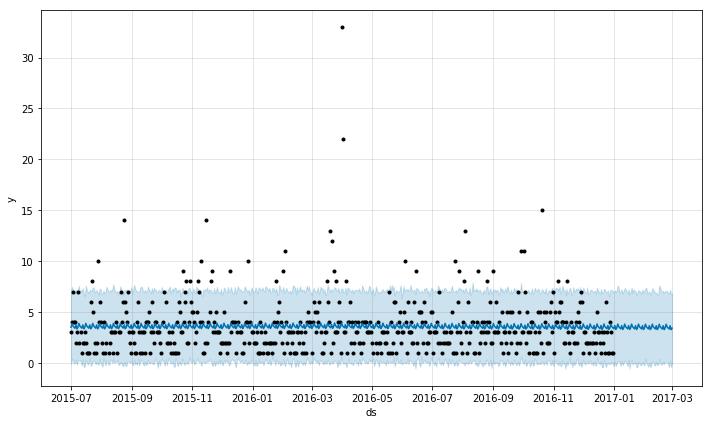

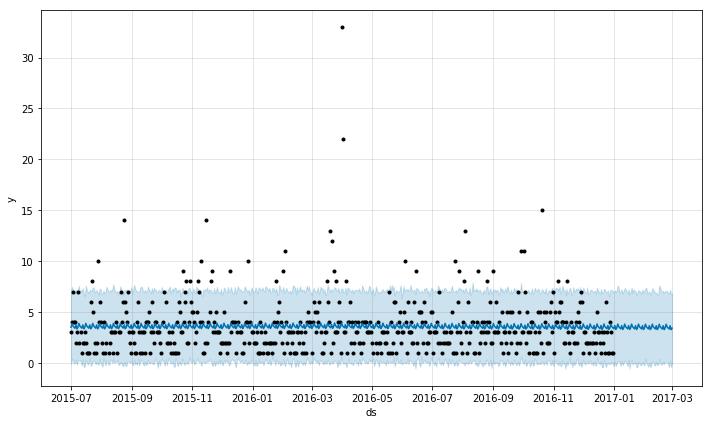

In [310]:
m.plot(forecast)

In [311]:
test.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a
